In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

%run helper-fx.py

In [ ]:
cumsumBL = []
cumsumBLsal = []
cumsumBLpcp = []

cumsumDIS= []
cumsumDISsal = []
cumsumDISpcp = []

for i in rats:
    j = 's3'
    x = rats[i].sessions[j]
    cumsumBL.append(x.firstlick)
    if x.condition == 'SAL':
        cumsumBLsal.append(x.firstlick)
    elif x.condition == 'PCP':
        cumsumBLpcp.append(x.firstlick)
        
    j = 's4'
    x = rats[i].sessions[j]
    cumsumDIS.append(x.firstlick)
    if x.condition == 'SAL':
        cumsumDISsal.append(x.firstlick)
    elif x.condition == 'PCP':
        cumsumDISpcp.append(x.firstlick)

In [23]:
def cleanup_pdps(pdps, minpdp=0.12):
    # code to flatten pdps if needed
    try:
        pdps = [item for rat in pdps for item in rat]
    except:
        pass
    
    pdps = [pdp for pdp in pdps if not np.isnan(pdp)]
    pdps = [pdp for pdp in pdps if pdp > minpdp]
    
    return pdps

In [24]:
def organize_pdps(all_pdps):

    pdps = cleanup_pdps(all_pdps)

    sort_pdps = np.sort(pdps)
    p_pdps = [1-(yval/len(pdps)) for yval in np.arange(len(pdps))]

    x = np.log(sort_pdps)
    y = p_pdps

    return x, y

def func(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value**2

def double_exp(x, y):
    popt, pcov = curve_fit(func,x,y)

    p1 = popt[0] # This is your a
    p2 = popt[1] # This is your b
    p3 = popt[2] # This is your c
    p4 = popt[3] # This is your d

    if p1<p3:
        p1, p3 = p3, p1
        p2, p4 = p4, p2

    curvey = func(x,p1,p2,p3,p4)

    r2 = rsquared(y, curvey)
    
    return [p1, p2, p3, p4], curvey, r2


In [37]:
len(rats)

16

dpcp1.1  did not work
dpcp1.3  did not work


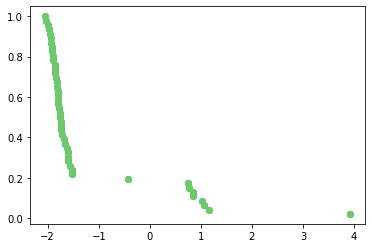

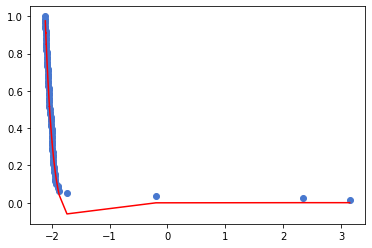

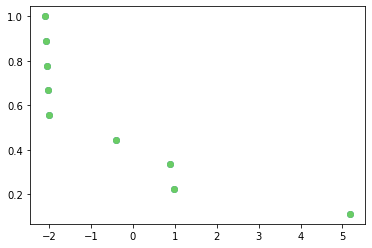

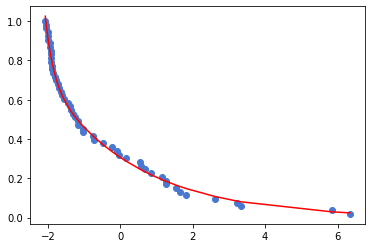

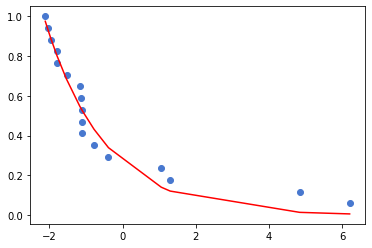

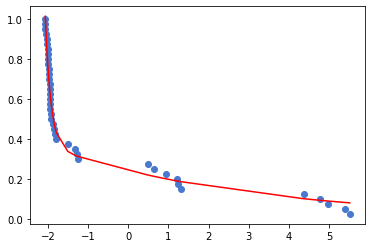

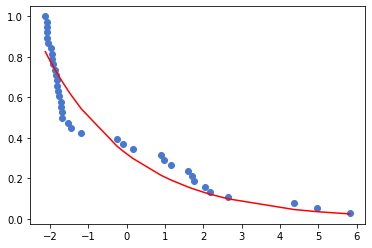

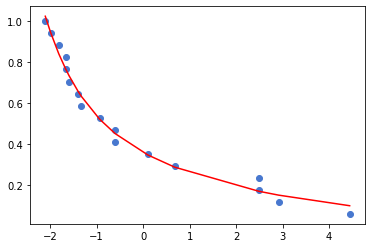

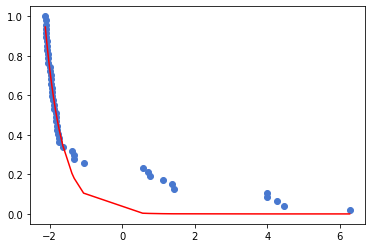

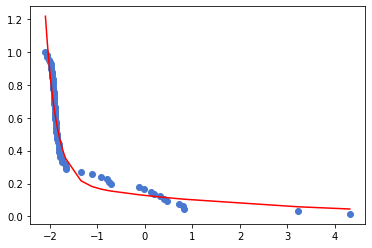

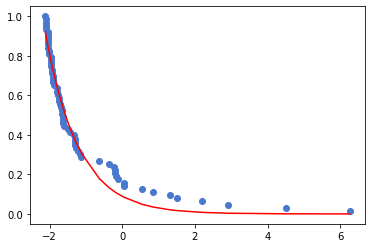

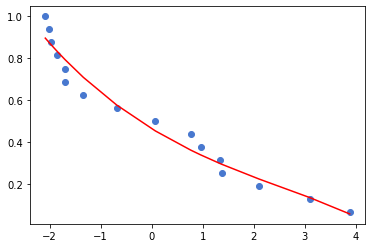

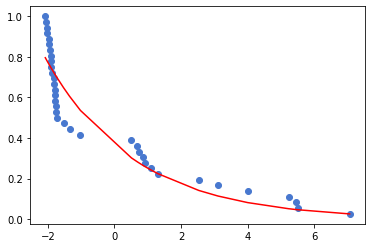

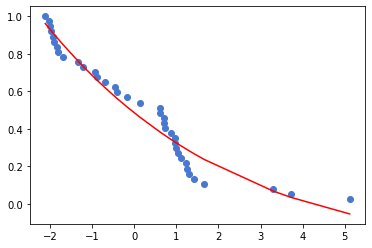

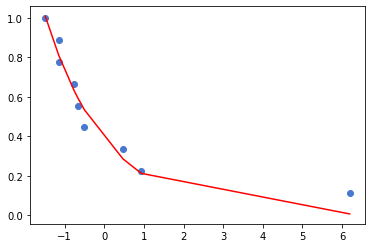

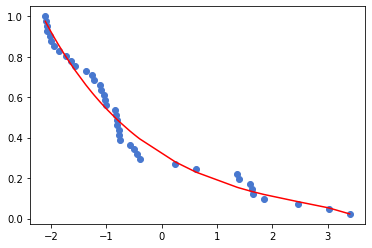

In [40]:


rat_list=[]
coefs_list=[]
ycurves_list=[]
r2_list=[]

for i in rats:
    j = 's4'
    s = rats[i].sessions[j]
    all_pdps = s.firstlick
    x,y = organize_pdps(all_pdps)
    f, ax = plt.subplots()
    ax.plot(x, y, 'o')
    try:
        coefs, ycurve, r2 = double_exp(x, y)
        rat_list.append(i)
        coefs_list.append(coefs)
        ycurves_list.append(ycurve)
        r2_list.append(r2)
        ax.plot(x, ycurve, color='r')
    except:
        plt.plot(x,y, 'o')
        print(i, ' did not work')
    
    

(0, 2)

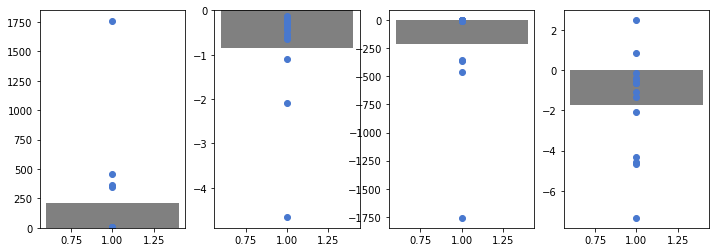

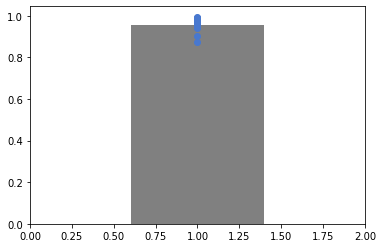

In [48]:
f, ax = plt.subplots(ncols=4, figsize=(12, 4))

for i in range(len(coefs)):
    data = [coef[i] for coef in coefs_list]
    ax[i].bar(1, np.mean(data), color='grey')
    ax[i].plot([1]*len(data), data, 'o')
        
f, ax = plt.subplots()
ax.bar(1, np.mean(r2_list), color='grey')
ax.plot([1]*len(r2_list), r2_list, 'o')
ax.set_xlim([0, 2])
    
    

In [12]:
s = rats['dpcp1.2'].sessions['s4']

all_pdps = s.firstlick
x,y = organize_pdps(all_pdps)
coefs, ycurve, r2 = double_exp(x, y)

print(coefs, r2)

No way
[0.24301042614526544, -4.669468423670843, -0.24334827786233046, -4.66871154689415] 0.9886580278983667


In [ ]:


fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(x, curvey)
#ax.set_xscale('log')

In [ ]:
bins=np.arange(0, 0.4, 0.02)

f, ax = plt.subplots()
ax.hist(x, bins=bins)


In [ ]:
curvey